<a href="https://colab.research.google.com/github/jacksone1/DataSci/blob/main/Copy_of_Unit3ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 18.7 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [2]:
import preliz as pz

# Unit 3 Exercises: Delightfully Diverse Distirbutions

Use these exercises as a chance to explore the probability distributions (dists) from the pymc and preliz libraries. [Moments](https://en.wikipedia.org/wiki/Moment_(mathematics)), the main subject of these exercises, are a great way to describe dists, but there's another  way: [maximum entropy](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution#Other_examples), which  we'll cover in a later unit.

Here's what we'll cover in this Unit's exercises:
- The first four moments: mean, variance, skew, and kurtosis, as well as the support.
- Single variable continuous distributions.
- Single variable discrete distriutions


Why do we need to know this stuff? Two reasons:
- Probability distributions are required to set priors and likelihoods in pymc.
- Randomness and uncertainty are not well defined mathematically, but probability and probability distributions are.

With that in mind, think of these exercises as an oppurtunity to explore the ways we can be uncertain, or the ways things can be random.

## The First Four Moments: Mean, Variance, Skew, and Kurtosis

When we talk about a probablity dist, we often care about at four things:
- The expected value, or where a distribution is centered (mean)
- The amount of variation from that centered value (variation)
- Whether or not our distribution favors, leans towards, or skews towards certain values. (skew)
- How often to expect unusually high or low values. (kurtosis)

### Playing with Beta

**Task1**:

Plot a [preliZ Beta distribution](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.distributions.beta.Beta) with $α=1$ and $β=1$.

<Axes: >

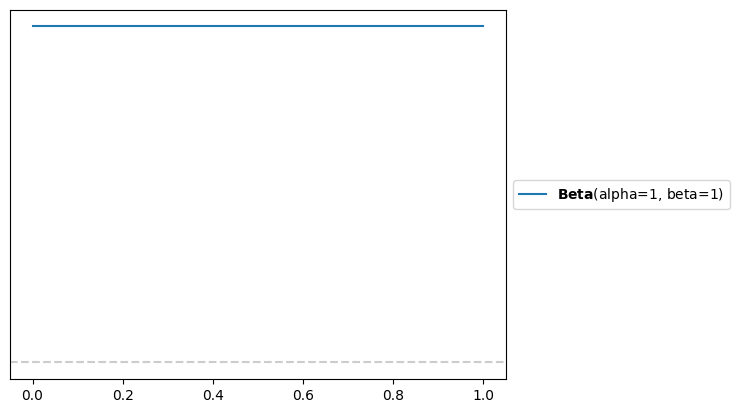

In [3]:
pz.Beta(1, 1).plot_pdf()

**Task2**:

Find the mean, variance, skew, and kurtosis of a $Beta(1,1)$ distribution. This is the same as asking for the first four moments of a $Beta(1,1)$ distribution.

*Hint*: preliZ has built in function that does this for you.

In [4]:
pz.Beta(1, 1).moments()

[0.5, 0.08333333333333333, array(0.), -1.2]

**Task3**:

Plot the following distributions: $Beta(1,1)$, $Beta(0.9,0.9)$, $Beta(2,1)$, $Beta(1,2)$, $Beta(7,11)$, $Beta(96,42)$, $Beta(5,5)$, $Beta(500,500)$, $Beta(0.8,0.9)$.

Then, determine which of those distribtuions has:
- the largest/smallest mean
- the largest/smallest variance
- the largest/smallest skew
- the largest/smallest kurtosis

Least Moments:
(Beta(alpha=1, beta=2), 0.3333333333333333)
(Beta(alpha=500, beta=500), 0.00024975024975024975)
(Beta(alpha=2, beta=1), -0.565685424949238)
(Beta(alpha=0.8, beta=0.9), -1.263657274295572)
Greatest Moments:
(Beta(alpha=96, beta=42), 0.6956521739130435)
(Beta(alpha=0.8, beta=0.9), 0.09227220299884659)
(Beta(alpha=1, beta=2), 0.565685424949238)
(Beta(alpha=500, beta=500), -0.005982053838484547)


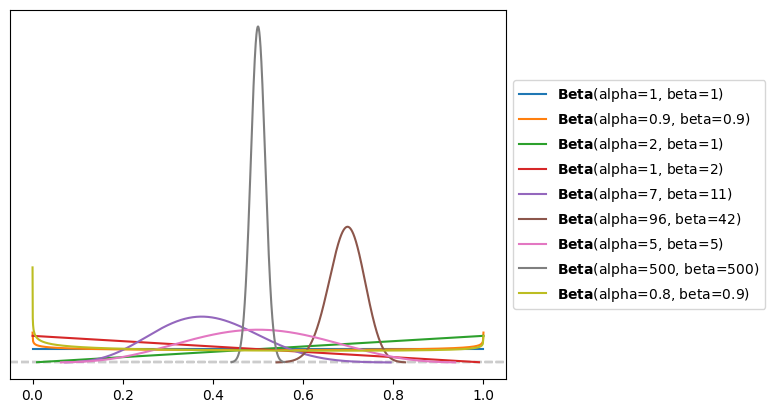

In [5]:
#Create a list of the beta distributions
dists = [pz.Beta(1,1), pz.Beta(0.9,0.9), pz.Beta(2,1), pz.Beta(1,2), pz.Beta(7,11), pz.Beta(96,42), pz.Beta(5,5), pz.Beta(500, 500), pz.Beta(0.8, 0.9)]
#Create lists for the distributions with the least and greatests moments
least = []
greatest = []
#Load default values into the moment lists
for i in range(0, 4):
  #The entries for least start at the first distribution and the highest possible value
  least.append((dists[0], float('inf')))
  #The entries for greatest start at the first distribution and the lowest possible value
  greatest.append((dists[0], float('-inf')))

#For each distribution 'd' in dists:
for d in dists:
  #Plot d
  d.plot_pdf()
  #For each of the moments:
  for m in range(0, 4):
    #If moment m of distribution d is less than the corresponding least moment, update the least moment
    if d.moments()[m] < least[m][1]:
      least[m] = (d, d.moments()[m])
    #If moment m of distribution d is greater than the corresponding greatest moment, update the greatest moment
    if d.moments()[m] > greatest[m][1]:
      greatest[m] = (d, d.moments()[m])

#Print the least and greatest moments with their corresponding distributions
print("Least Moments:")
for l in least:
  print(l)
print("Greatest Moments:")
for g in greatest:
  print(g)

###Playing with other Continuous Distributions

For the remaining tasks, make sure to continue to use the [preliZ documentation](https://preliz.readthedocs.io/en/latest/api_reference.html).

The [wikipedia pages for each of the probability distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions) are also great resources.

[Wolfram Alpha](https://www.wolframalpha.com/examples/mathematics/probability/probability-distributions) is another great resource as well.

**Task4**:

Plot the pdfs of each of the following distributions: $Normal(μ=0,σ=1)$, $StudentT(ν=1,μ=0,σ=1)$, $Exponential(λ=1/2)$, $Gamma(α=2,β=1)$, $HalfStudentT(ν=1,σ1)$

For the T distribution, use

```
support=(-4,4)
```
inside the plot_pdf function.


/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/dufunc.py:287: RuntimeWarning: divide by zero encountered in nb_logpdf
  return super().__call__(*args, **kws)


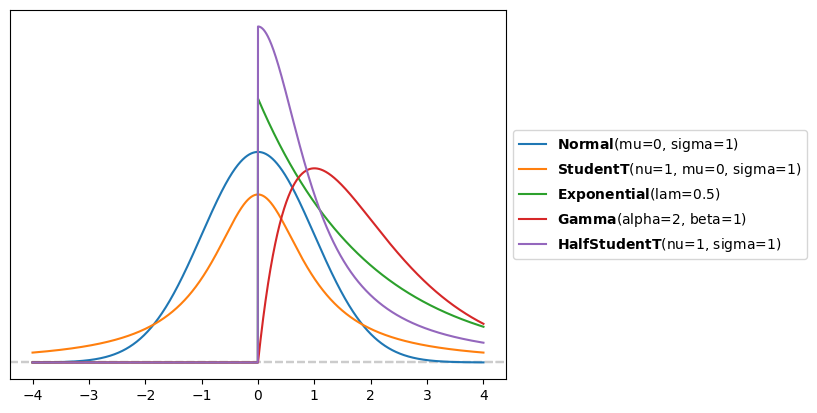

In [6]:
dists4 = [pz.Normal(0, 1), pz.StudentT(1, 0, 1), pz.Exponential(0.5), pz.Gamma(2, 1), pz.HalfStudentT(1, 1)]
for d in dists4:
  d.plot_pdf(support=(-4, 4))

**Task5**:

What x values do the Exponenital, Gamma, HalfSutdentT, and HalfNormal functions support? What x values do the Normal and T distribution support? What x values does the Beta distribution support?

The Exponential, Gamma, HalfT, and HalfNormal distributions support positive x values, while the Normal and T distributions support all real numbers. The Beta distribution supports x values between 0 and 1.

**Task6**:

Can a distribution with support $[0,∞]$ have negative (or left) skew? If so, plot that specific distribution.

<Axes: >

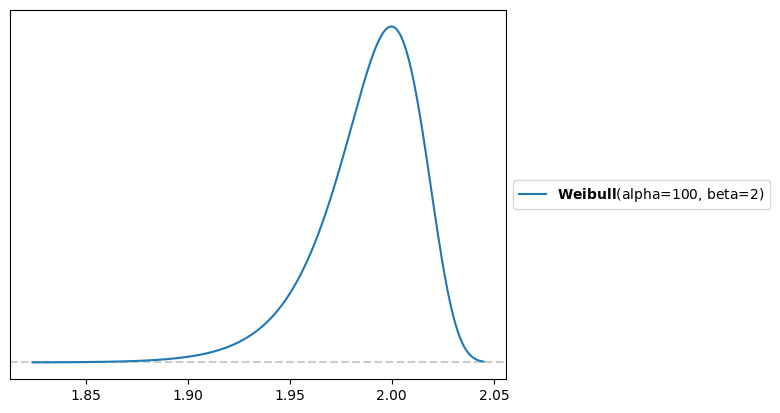

In [7]:
#Yes, the Weibull distribution can have left skew.
pz.Weibull(100, 2).plot_pdf()

**Task7**:

Name a distribution that supports the real numbers with variance equal to 1, 0 skew, and 0 kurtosis.

In [8]:
#The normal distribution with mean=0 and sigma=1 has 0 mean, skew, and kurtosis with 1 variance.
pz.Normal(0,1).moments()

[0.0, 1.0, 0, 0]

**Task8**:

Name a distribution with support $(-∞,∞)$ and that has negative skew.

<Axes: >

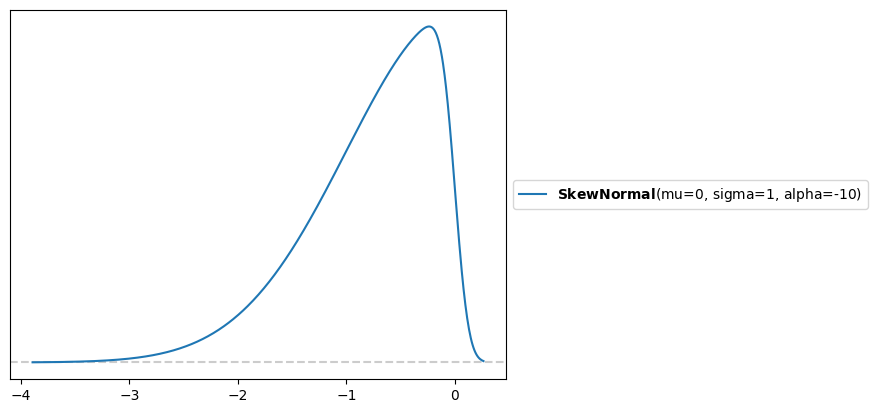

In [9]:
#The skew normal distributions with negative alphas have left skew.
pz.SkewNormal(0, 1, -10).plot_pdf()

###Playing with Discrete Distributions

**Task9**:

Plot the pdfs (techincally the pmfs) of the following distributions: $Bernoulli(p=0.7)$, $Binomial(n=10,p=0.7)$, $Poisson(λ=7)$, $Geometric(p=0.7)$, $HyperGeometric(N=50,k=35,n=15)$, $Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4])$

Additionally, compute the first four moments for all those distributions--except the Categorical distribution.

[0.7, 0.21000000000000002, -0.8728715609439692, -1.238095238095238]
[7.0, 2.1000000000000005, -0.27602622373694163, -0.12380952380952379]
[7.0, 7.0, 0.3779644730092272, 0.14285714285714285]
[1.4285714285714286, 0.6122448979591838, 2.3734644158557194, 7.633333333333333]
[10.5, 2.25, -0.1111111111111111, -0.08983451536643026]


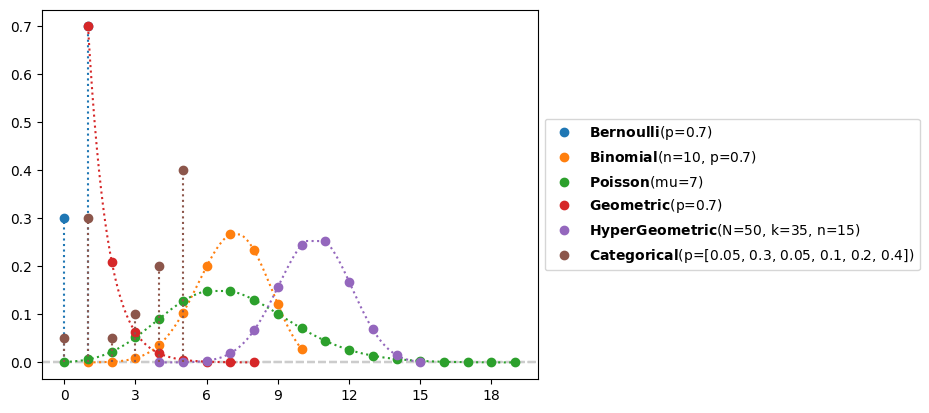

In [11]:
dists9 = [pz.Bernoulli(0.7), pz.Binomial(10, 0.7), pz.Poisson(7), pz.Geometric(0.7), pz.HyperGeometric(50, 35, 15), pz.Categorical([0.05, 0.3, 0.05, 0.1, 0.2, 0.4])]
for d in range(0, len(dists9)):
  dists9[d].plot_pdf()
  if d != len(dists9) - 1:
    print(dists9[d].moments())

**Task10**:

Describe what processes "generate" each of the previous discrete distributions models. Also report their support.

Here's a spicier way to phrase the question: describe these distributions' maximum entropy conditions in english.

Hint: Make sure to read any of the: preliZ documentation, relevant wikipedia articles, or wolfram alpha.


The Bernoulli distribution is the maximum entropy distribution for a random variable supporting {0,1} given a proportion of successes.

The Binomial distribution is the maximum entropy distribution of successes given a mean number of successes that supports {0, 1, ..., n} where n is the number of trials.

The Poisson distribution is the maximum entropy distribution of a number of independent events occuring in a certain interval given a mean rate of occurrences of the event. It supports the set of all natural numbers.

The Geometric distribution describes the number of Bernoulli trials needed to get a success with support for natural numbers or the number of failures before that first success with support for 0 and natural numbers. It is the maximum entropy distribution of that context given the reciprocal of the proportion of successes for a Bernoulli random variable.

The Hypergeometric distribution is the maximum entropy distribution of the number of successes in n draws successes given a population of N individuals of which K have a trait characteristic of success. This is similar to the Binomial distribution, except this distribution uses drawing without replacement instead of with replacement. It supports {max(0, n+K-N), ..., min(n, K)}

The Categorical distribution is the maximum entropy distribution for a random variable representing a k-way event given the probability of each outcome. The probabilities of each outcome must be between 0 and 1 and all sum to 1. The distribution supports {0, 1, ..., k - 1} where k is the number of categories or outcomes for the variable.